In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import tensorflow as tf

In [2]:
number_of_shots_per_movie = []
number_of_scene_boundaries_per_movie = []
number_of_shot_boundaries_per_movie = []
imdb_id = []
shots_per_scene = []
last_s = []
first_s = []
total_shots = 0
for i in tqdm(os.listdir('TF_Data')):
    with open('TF_Data/'+i, 'rb') as f:
        m_data = pickle.load(f)
    
    total_shots += m_data['place'].shape[0]  
    last_s.append(m_data['labels'][-1])
    first_s.append(m_data['labels'][0])
    count = 0
    for c_ in m_data['labels']:
        if c_ == 0:
            count += 1
        elif c_ == 1:
            shots_per_scene.append(count)
            count = 0
        else:
            print('Error!!')
            break
    
    imdb_id.append(m_data['imdb_id'])
    number_of_shots_per_movie.append(m_data['place'].shape[0])
    number_of_scene_boundaries_per_movie.append((tf.reduce_sum(m_data['labels'])).numpy())
    number_of_shot_boundaries_per_movie.append((len(m_data['labels']) - tf.reduce_sum(m_data['labels'])).numpy())
    

100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:20<00:00,  3.18it/s]


In [3]:
print('Total Number of Shots in the whole data: ', total_shots)

Total Number of Shots in the whole data:  106041


Text(0.5, 0, 'Scenes-->')

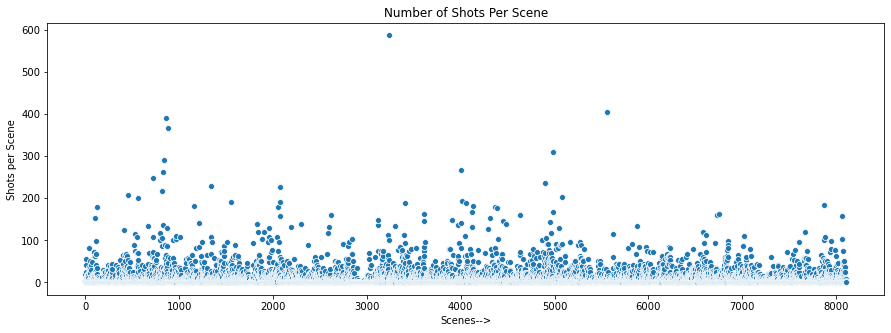

In [4]:
plt.figure(figsize=(15,5))
plt.title('Number of Shots Per Scene')
sns.scatterplot(range(len(shots_per_scene)), shots_per_scene)
plt.ylabel('Shots per Scene')
plt.xlabel('Scenes-->')
#t1, t2 = plt.xticks(range(64), imdb_id, rotation = 90)

This plot shows that a typical scene is comprises of less than 20 shots. But there are also scenes which has more than 300 shots, highest being 587.

In [5]:
np.average(shots_per_scene)  # Average number of shots per scene

11.998766954377311

In [6]:
def sps(shots_p_scene, k):
    c = 0
    for i in range(len(shots_p_scene)):
        if shots_p_scene[i] < k:
            c += 1
    return c

In [7]:
print('Percentage of scenes with less than 20 shots : ', (sps(shots_per_scene, 20)/len(shots_per_scene))*100)
print('Percentage of scenes with less than 40 shots : ', (sps(shots_per_scene, 40)/len(shots_per_scene))*100)
print('Percentage of scenes with less than 50 shots : ', (sps(shots_per_scene, 50)/len(shots_per_scene))*100)
print('Percentage of scenes with less than 70 shots : ', (sps(shots_per_scene, 70)/len(shots_per_scene))*100)
print('Percentage of scenes with less than 100 shots: ', (sps(shots_per_scene, 100)/len(shots_per_scene))*100)

Percentage of scenes with less than 20 shots :  81.81257706535142
Percentage of scenes with less than 40 shots :  92.88532675709001
Percentage of scenes with less than 50 shots :  95.0308261405672
Percentage of scenes with less than 70 shots :  97.53390875462392
Percentage of scenes with less than 100 shots:  98.79161528976572


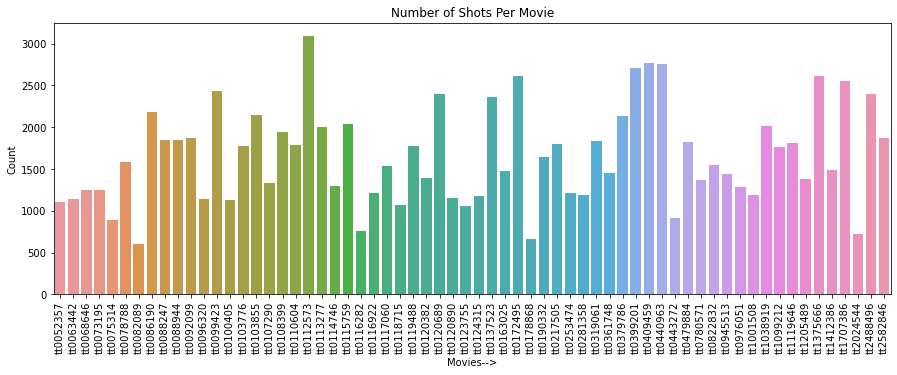

In [8]:
plt.figure(figsize=(15,5))
plt.title('Number of Shots Per Movie')
sns.barplot(list(range(64)), number_of_shots_per_movie)
plt.ylabel('Count')
plt.xlabel('Movies-->')
t1, t2 = plt.xticks(range(64), imdb_id, rotation = 90)

In [9]:
print('Average number of shots across the Movies: ', np.average(number_of_shots_per_movie))

Average number of shots across the Movies:  1656.890625


Average number of shots per movie across the available dataset is 1657. Some movies are short with number of shots ranging between 500-1000, while we also have some long duration movies with number of shots exceeding 2500. 

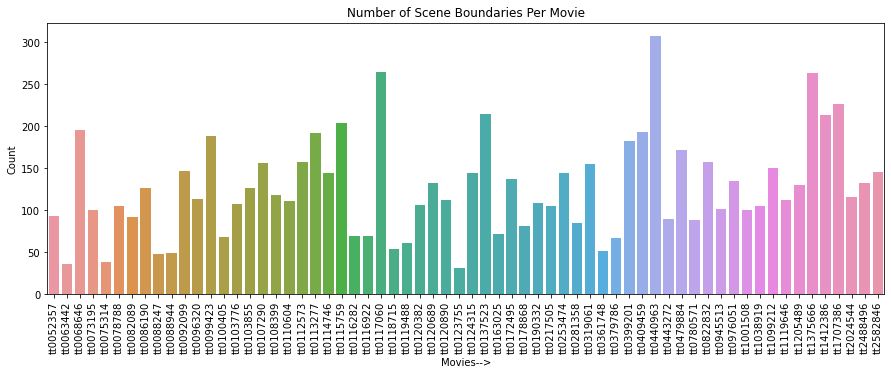

In [10]:
plt.figure(figsize=(15,5))
plt.title('Number of Scene Boundaries Per Movie')
sns.barplot(list(range(64)), number_of_scene_boundaries_per_movie)
plt.ylabel('Count')
plt.xlabel('Movies-->')
t1, t2 = plt.xticks(range(64), imdb_id, rotation = 90)

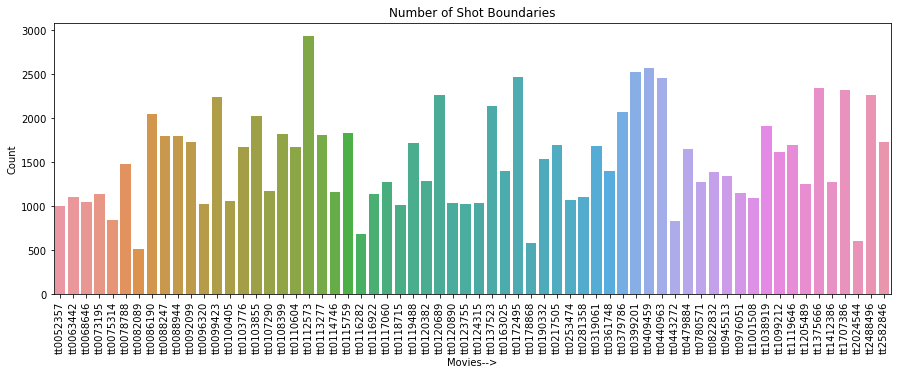

In [11]:
plt.figure(figsize=(15,5))
plt.title('Number of Shot Boundaries')
sns.barplot(list(range(64)), number_of_shot_boundaries_per_movie)
plt.ylabel('Count')
plt.xlabel('Movies-->')
t1, t2 = plt.xticks(range(64), imdb_id, rotation = 90)

In [12]:
ratio_shot_to_scene = []
for k in range(64):
    ratio_shot_to_scene.append(number_of_shot_boundaries_per_movie[k]/number_of_scene_boundaries_per_movie[k])

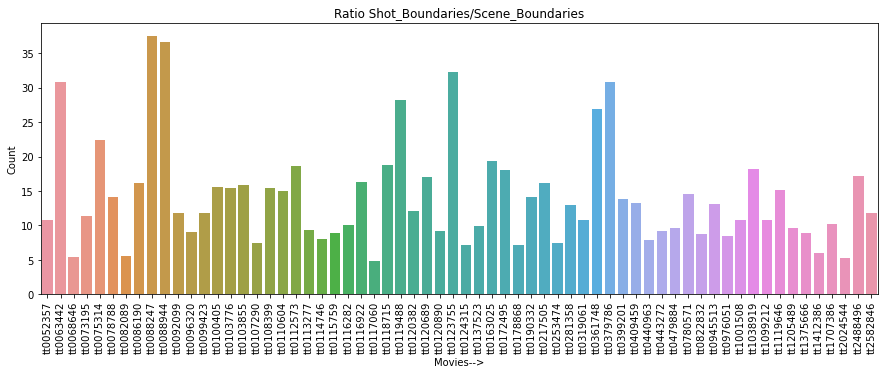

In [13]:
plt.figure(figsize=(15,5))
plt.title('Ratio Shot_Boundaries/Scene_Boundaries')
sns.barplot(list(range(64)), ratio_shot_to_scene)
plt.ylabel('Count')
plt.xlabel('Movies-->')
t1, t2 = plt.xticks(range(64), imdb_id, rotation = 90)

We can see that the shot boundaries exceed in number to the scene boundaries by atleast 5 times for every movie. Therefore, in terms of binary classification scenario, this becomes an imbalanced classification problem. Accuracy won't be a good measure in this scenario. mAP is definitely a metric that can be used.

In [14]:
len(last_s) # last_s stores the status of the last shot/scene boundary in a movie

64

In [15]:
for i in range(64):
    last_s[i] = last_s[i].numpy()

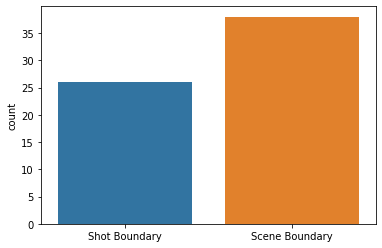

In [16]:
sns.countplot(last_s)
x, y = plt.xticks(ticks=[0,1], labels=['Shot Boundary', 'Scene Boundary'])

We can see that majority of the movies typically end with a scene.

In [17]:
print('Total number of Movie scenes ending with a scene boundary: ', sum(last_s))

Total number of Movie scenes ending with a scene boundary:  38


In [18]:
sum(first_s) # From this, we can say that movies usually don't begin with a scene

<tf.Tensor: shape=(), dtype=int32, numpy=17>